In [1]:
#import required packages
import pandas as pd
# import librosa
# import librosa.display
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import numpy as np
%matplotlib inline


In [2]:
#testing a sample audio file
sample_filepath = "data/audio/fold1/101415-3-0-2.wav"

In [3]:
#Reading te sample audio wav file
#Returns the wave sample rate and audio data 
wave_sample_rate, wave_audio = wav.read(sample_filepath)
print(wave_sample_rate)
print(wave_audio)

48000
[   -5    -5    -6 ... -1576 -1566 -1557]


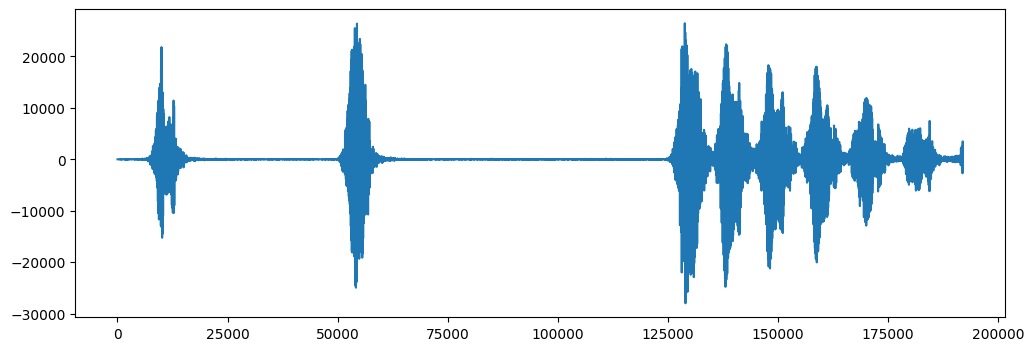

In [4]:
#plotting the data from the sample file
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [5]:
#reading the dataset
metadata = pd.read_csv('data/data.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [6]:
#counting each class
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

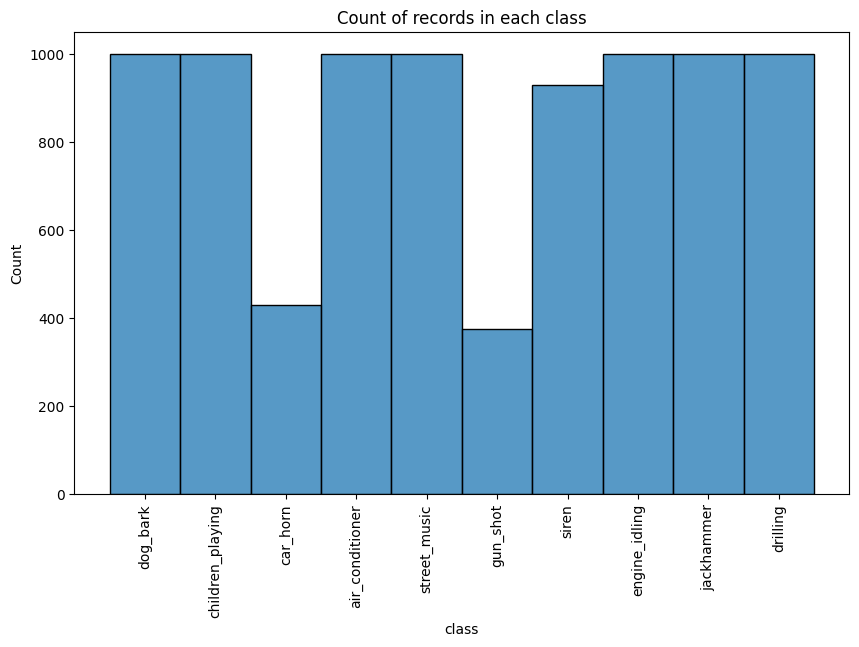

In [7]:
#plotting records in each class
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(metadata['class'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

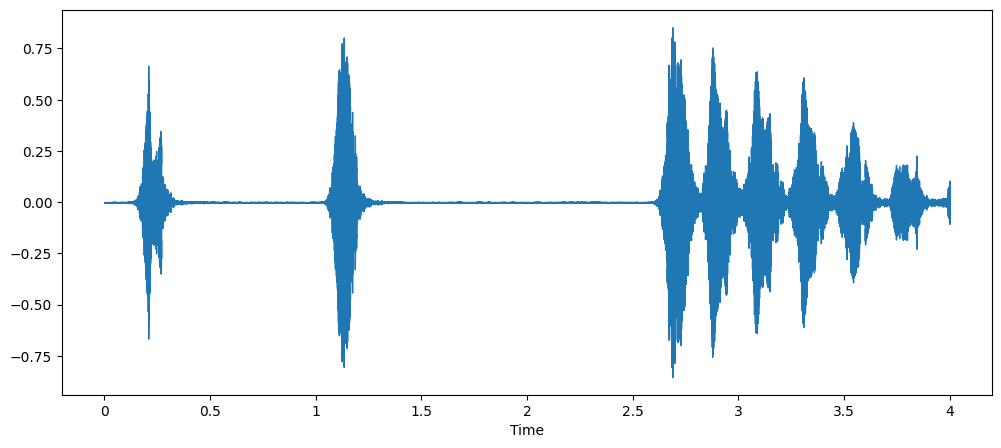

In [8]:
import librosa
import librosa.display
data, sample_rate = librosa.load(sample_filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [9]:
#function to extract mfcc features from an audio file using python librosa package
def features_extractor(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name) 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [12]:
# example mfcc feature extraction
sample_mfcc_features = features_extractor(sample_filepath)
sample_mfcc_features

array([-4.0243027e+02,  9.2263443e+01,  1.9303581e+01, -1.3194186e+01,
       -5.8065710e+00,  2.4085872e+00, -1.4885646e+01, -8.0709305e+00,
       -9.4173031e+00, -6.2206793e+00,  9.7337997e-01, -5.7620907e+00,
        1.6563396e+00,  6.7246372e-01,  9.6400869e-01,  5.7375956e+00,
        3.1241553e+00,  3.0485246e+00, -4.2087193e+00, -3.6097057e+00,
       -1.9673734e+00, -2.9645166e+00, -3.7746885e+00, -5.3530912e+00,
       -2.2000828e+00, -2.0416179e+00, -3.2888551e+00,  5.7399750e-01,
       -1.1104012e+00,  4.3472397e-01, -1.4518259e+00, -4.9205983e-01,
       -3.1837819e+00,  5.2147396e-02, -2.5222809e+00, -2.4589782e+00,
       -3.5944936e+00, -9.8115039e-01, -2.9335878e+00, -2.3980341e+00],
      dtype=float32)

In [13]:
#Now we ned to extract the featured from all the audio files so we use tqdm
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
audio_dataset_path = 'data/audio/'
extracted_features_1=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data_1=list(features_extractor(file_name))
    data_1.append(final_class_labels)
    extracted_features_1.append(data_1)

3553it [01:17, 29.44it/s] c:\Users\ravis\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [03:46, 28.50it/s]c:\Users\ravis\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [03:46, 32.12it/s]c:\Users\ravis\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [03:59, 36.47it/s]


In [14]:
extracted_features_1[0]

[-211.93698,
 62.581203,
 -122.81315,
 -60.745293,
 -13.89376,
 -29.789835,
 -3.9788747,
 11.682742,
 12.963828,
 8.336421,
 -6.529819,
 -2.9961066,
 -12.88795,
 5.8859324,
 -2.4752254,
 -4.408311,
 -15.014478,
 -0.94399726,
 -2.57991,
 6.098297,
 -10.78623,
 -8.0634775,
 5.84409,
 -3.1225374,
 -5.984229,
 -0.07994461,
 -3.6870897,
 4.7476764,
 -6.530095,
 -5.083883,
 0.48772553,
 7.510886,
 -0.88535947,
 2.393814,
 -6.392372,
 -2.1318593,
 2.2760148,
 -0.79108346,
 -1.5400683,
 1.3211495,
 'dog_bark']

In [15]:
#creating a final features dataframe
features_df = pd.DataFrame(extracted_features_1)

In [16]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-211.936981,62.581203,-122.813148,-60.745293,-13.893760,-29.789835,-3.978875,11.682742,12.963828,8.336421,...,7.510886,-0.885359,2.393814,-6.392372,-2.131859,2.276015,-0.791083,-1.540068,1.321149,dog_bark
1,-417.005188,99.336624,-42.995586,51.073326,9.853778,7.969693,11.197089,1.929117,7.030397,4.270228,...,2.277220,-1.539243,0.767109,-0.878724,0.908738,-2.681854,1.706798,-1.793606,1.761384,children_playing
2,-452.393158,112.362534,-37.578068,43.195866,8.631845,15.379366,16.882149,1.233047,6.833122,3.900115,...,-0.154539,-5.285954,-0.790016,-2.979211,-0.202845,-3.088082,3.808014,-0.090056,0.869102,children_playing
3,-406.479218,91.196602,-25.043556,42.784519,11.586844,5.054164,12.431632,-1.599948,6.656064,1.442355,...,1.279155,0.635733,1.414131,-2.831121,1.808179,-2.178431,-0.436479,-3.051344,-0.170013,children_playing
4,-439.638733,103.862244,-42.658787,50.690277,12.209422,15.873465,11.729268,1.533585,11.292244,2.548621,...,-0.774089,-0.985246,2.566369,-2.976878,1.071741,-1.825601,3.291397,-0.169670,1.392584,children_playing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-391.372101,125.362389,-40.634056,25.899754,1.730347,5.575200,16.873087,7.889440,3.488613,-4.572376,...,3.033987,3.553834,3.725876,-1.022627,2.604555,-5.585061,-5.811629,-3.813402,5.453191,car_horn
8728,-339.427155,76.409096,-35.309879,41.984035,-22.963873,-13.623511,27.856026,-9.215820,-5.666291,13.024159,...,3.299907,-0.265232,6.929850,3.841744,1.458774,-2.501516,3.609871,-3.208832,-1.789299,car_horn
8729,-297.315338,102.090263,-36.751080,26.816488,-0.249390,3.960868,11.113069,1.912290,0.677115,-1.804644,...,0.798328,3.187672,7.566283,2.161261,3.160489,-5.056086,-1.622446,1.252144,9.132168,car_horn
8730,-336.923859,115.313904,-44.847099,24.968985,-9.888025,-2.154685,22.700090,0.234236,-0.122909,10.174067,...,2.762247,5.435960,6.602448,0.774978,3.786686,-5.386269,-6.769113,-2.858387,6.953492,car_horn


In [17]:
#Renaming column 40 as class...as this is the target column
features_df.rename(columns = {40:'class'}, inplace = True)

In [18]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,class
0,-211.936981,62.581203,-122.813148,-60.745293,-13.893760,-29.789835,-3.978875,11.682742,12.963828,8.336421,...,7.510886,-0.885359,2.393814,-6.392372,-2.131859,2.276015,-0.791083,-1.540068,1.321149,dog_bark
1,-417.005188,99.336624,-42.995586,51.073326,9.853778,7.969693,11.197089,1.929117,7.030397,4.270228,...,2.277220,-1.539243,0.767109,-0.878724,0.908738,-2.681854,1.706798,-1.793606,1.761384,children_playing
2,-452.393158,112.362534,-37.578068,43.195866,8.631845,15.379366,16.882149,1.233047,6.833122,3.900115,...,-0.154539,-5.285954,-0.790016,-2.979211,-0.202845,-3.088082,3.808014,-0.090056,0.869102,children_playing
3,-406.479218,91.196602,-25.043556,42.784519,11.586844,5.054164,12.431632,-1.599948,6.656064,1.442355,...,1.279155,0.635733,1.414131,-2.831121,1.808179,-2.178431,-0.436479,-3.051344,-0.170013,children_playing
4,-439.638733,103.862244,-42.658787,50.690277,12.209422,15.873465,11.729268,1.533585,11.292244,2.548621,...,-0.774089,-0.985246,2.566369,-2.976878,1.071741,-1.825601,3.291397,-0.169670,1.392584,children_playing


In [19]:
#Saving the extracted features dataframe
features_df.to_csv('extracted_features.csv', index=False)